#### 4-1. 인구현황 데이터 분석

In [ ]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv('../data/인구현황.csv')

In [23]:
# 1. 지역별 총인구수 Top5
df_popu = \
df.loc[df['행정기관'] != '전국', ['행정기관', '총인구수']].sort_values(by='총인구수', ascending = False)
df_popu.head()

,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


In [24]:
%matplotlib inline

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

print('matplotlib ', matplotlib.__version__)
print('seaborn ', sns.__version__)

matplotlib  3.10.6
seaborn  0.13.2


In [28]:
#한글폰트 path 설정
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
#font의 파일정보로 font name 을 알아내기
font_name = fm.FontProperties(fname=font_path).get_name()
print(font_name)

Malgun Gothic


In [29]:
matplotlib.rc('font', family=font_name)

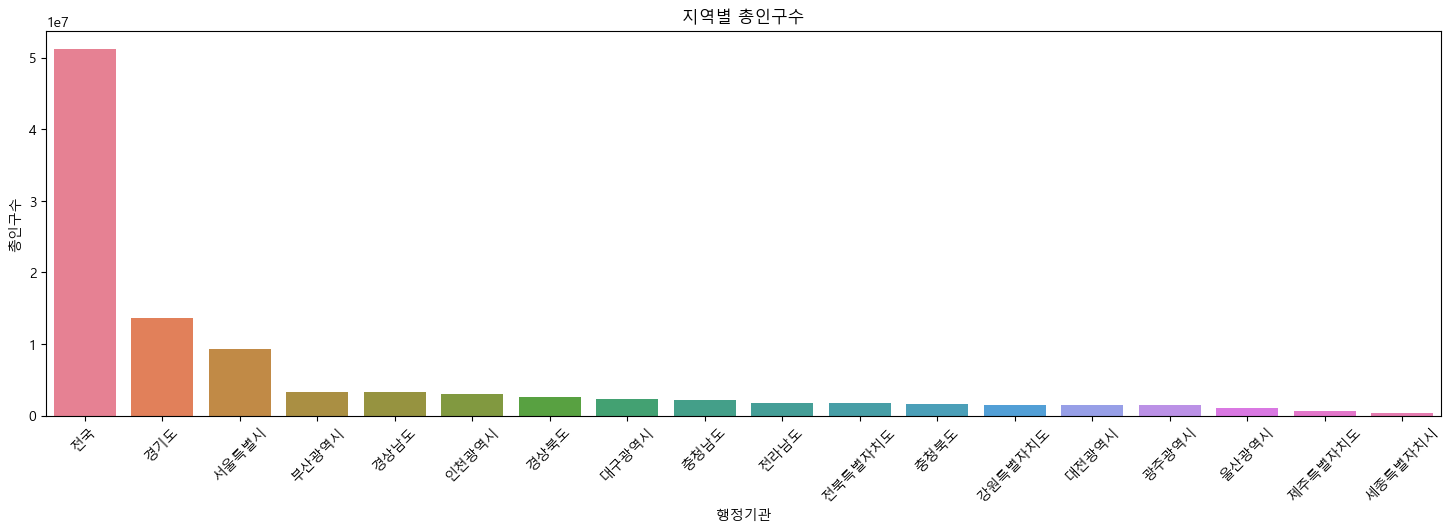

In [42]:
# 1-1. 지역별 총인구수 plot
figure,(axes1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,5)
popu_plot = sns.barplot(data = df.sort_values(by='총인구수', ascending=False), x='행정기관', y='총인구수', hue = '행정기관')

popu_plot.set_title('지역별 총인구수')

for item in axes1.get_xticklabels(): 
    item.set_rotation(45) # 글자 회전


In [46]:
# 2. 세대당 인구수 높은 지역 Top5
df_sede = df.loc[df['행정기관'] != '전국', ['행정기관', '세대당 인구']].sort_values(by='세대당 인구', ascending = False)
df_sede.head()

,행정기관,세대당 인구
8,세종특별자치시,2.39
9,경기도,2.26
7,울산광역시,2.22
4,인천광역시,2.20
3,대구광역시,2.14


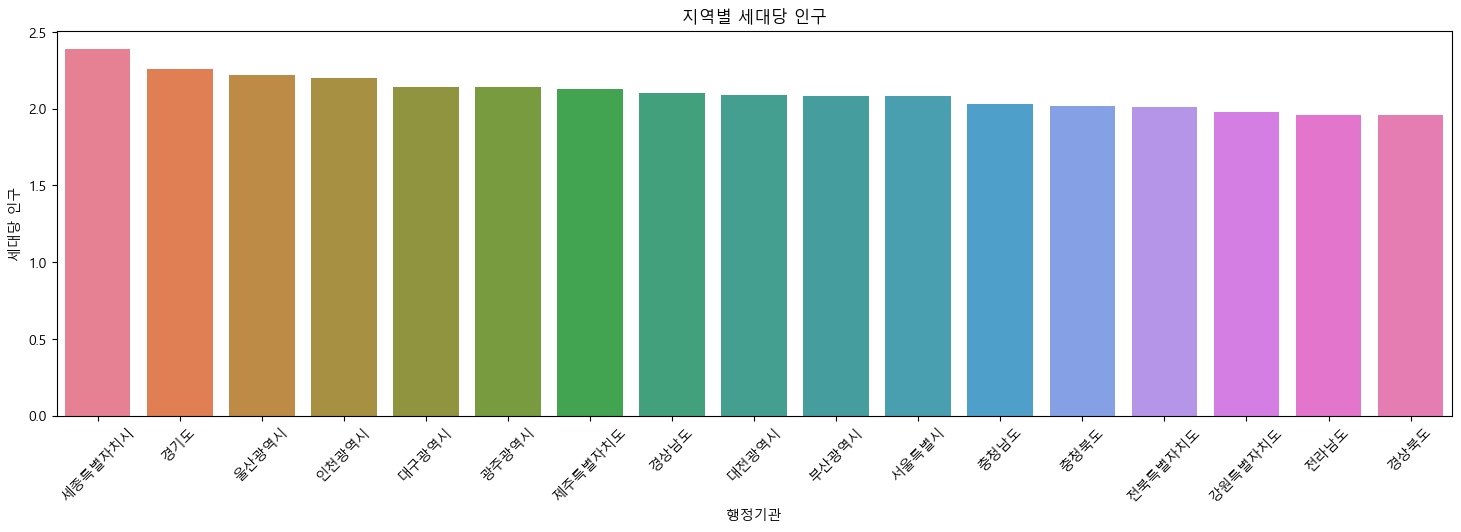

In [55]:
figure, axes2 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,5)
sede = sns.barplot(data = df_sede, x = '행정기관', y='세대당 인구', hue='행정기관')
sede.set_title('지역별 세대당 인구')

for item in axes2.get_xticklabels(): 
    item.set_rotation(45) # 글자 회전


In [58]:
# 3. 남녀 비율 분석
rate_df = df.loc[df['행정기관'] != '전국', ['행정기관', '남여 비율']].sort_values(by='남여 비율', ascending = False)
rate_df

,행정기관,남여 비율
7,울산광역시,1.06
12,충청남도,1.05
11,충청북도,1.04
16,경상남도,1.02
15,경상북도,1.02
14,전라남도,1.02
9,경기도,1.01
10,강원특별자치도,1.01
17,제주특별자치도,1.00
4,인천광역시,1.00


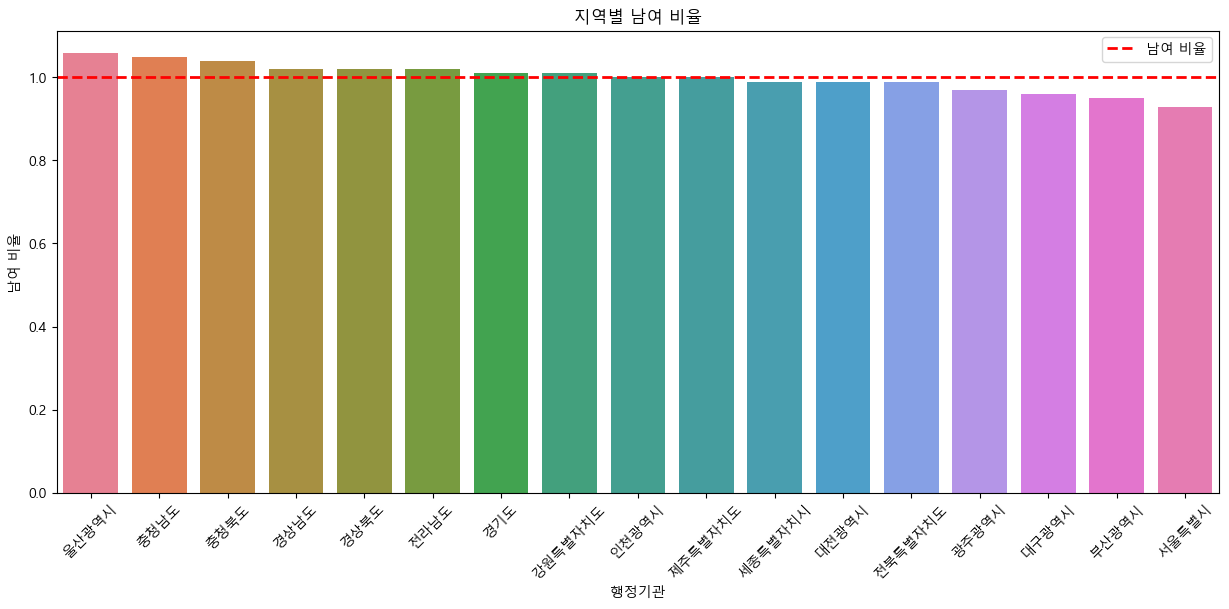

In [63]:
# 3-1. 남녀 비율 분석 Plot
plt.figure(figsize=(15, 6))

sns.barplot(data = rate_df.sort_values(by='남여 비율', ascending=False), x='행정기관', y='남여 비율', hue = '행정기관')
plt.xticks(rotation=45)
plt.title('지역별 남여 비율')
plt.axhline(y=1.0, color='red', linestyle='--', linewidth=2, label='남여 비율') # label 을 추가해줘야 범례에 표시됨
plt.legend(loc='upper right')
plt.show()

In [67]:
# 4. 남자초과 / 여자초과 분석
rate_df2 = df.loc[df['행정기관'] != '전국', ['행정기관', '남여 비율']]
rate_df2['성별분포'] = rate_df2['남여 비율'].map(lambda x: '남초' if x > 1 else ('여초' if x < 1 else '동일'))
rate_df2

,행정기관,남여 비율,성별분포
1,서울특별시,0.93,여초
2,부산광역시,0.95,여초
3,대구광역시,0.96,여초
4,인천광역시,1.00,동일
5,광주광역시,0.97,여초
6,대전광역시,0.99,여초
7,울산광역시,1.06,남초
8,세종특별자치시,0.99,여초
9,경기도,1.01,남초
10,강원특별자치도,1.01,남초


In [76]:
# 5. 세대당 인구 평균보다 높은 지역
sede_mean = df['세대당 인구'].mean()
result = df.loc[(df['행정기관'] != '전국') & (df['세대당 인구'] > sede_mean), ['행정기관', '세대당 인구']]\
            .sort_values(by='세대당 인구', ascending = False)
result

,행정기관,세대당 인구
8,세종특별자치시,2.39
9,경기도,2.26
7,울산광역시,2.22
4,인천광역시,2.20
3,대구광역시,2.14
5,광주광역시,2.14
17,제주특별자치도,2.13


In [ ]:
# 5-1.   남초 vs 여초 개수 Plot  ( seaborn의 countplot ) 지역별 세대수 Plot ( seaborn의 barplot)
# 지역별 세대수 데이터 만들기
sede_area = df.loc[df['행정기관'] != '전국', ['행정기관','세대수']].sort_values(by='세대수', ascending = False)
sede_area

Text(0.5, 1.0, '지역별 세대수')

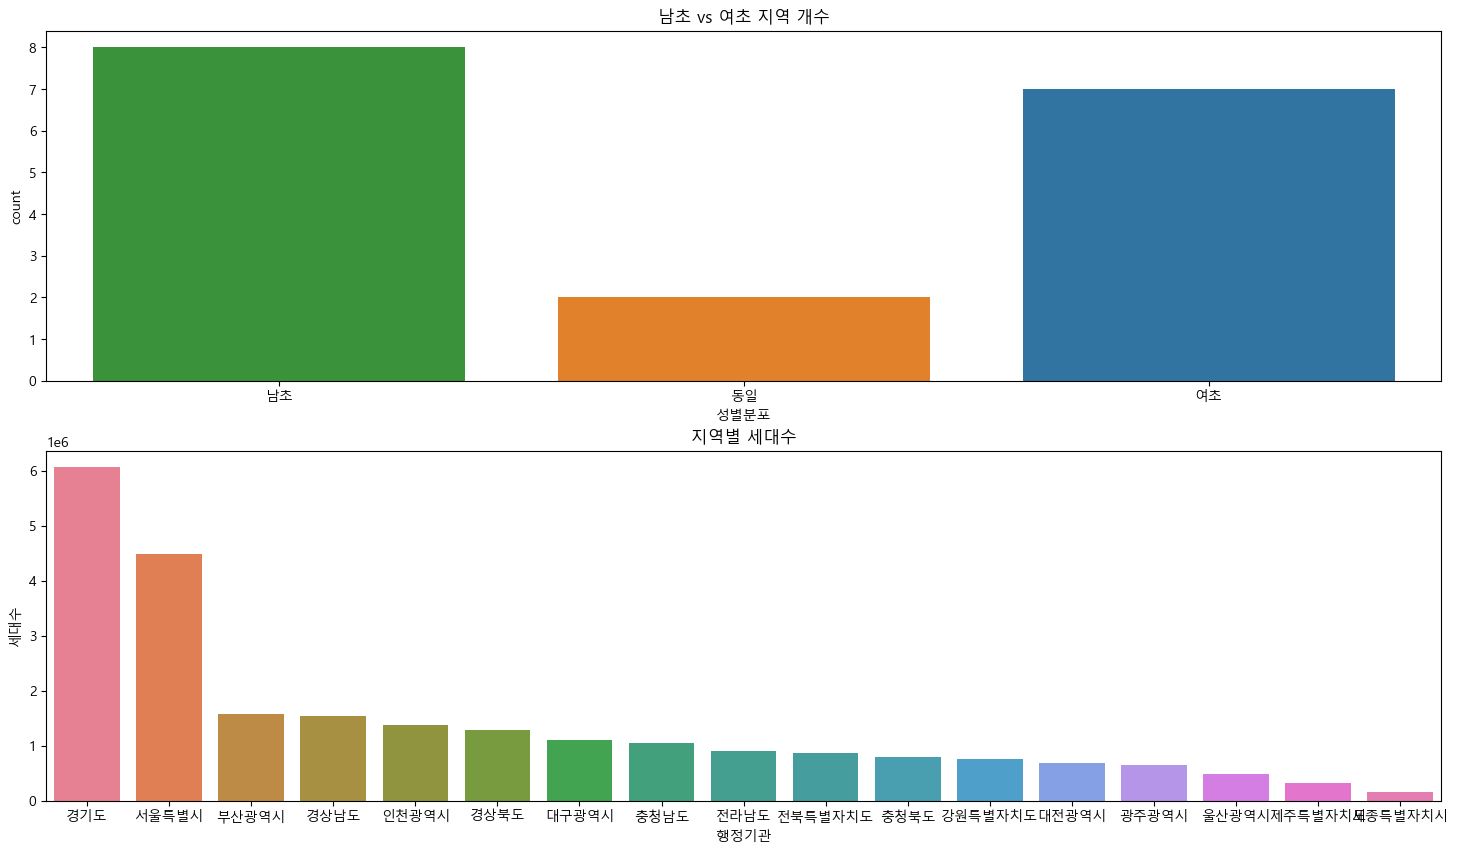

In [89]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,10)

plt1 = sns.countplot(data=rate_df2,ax = ax1, x='성별분포', order=['남초','동일','여초'], hue='성별분포')
plt1.set_title('남초 vs 여초 지역 개수')

plt2 = sns.barplot(data = sede_area, ax=ax2, x='행정기관', y='세대수', hue='행정기관')
plt2.set_title('지역별 세대수')

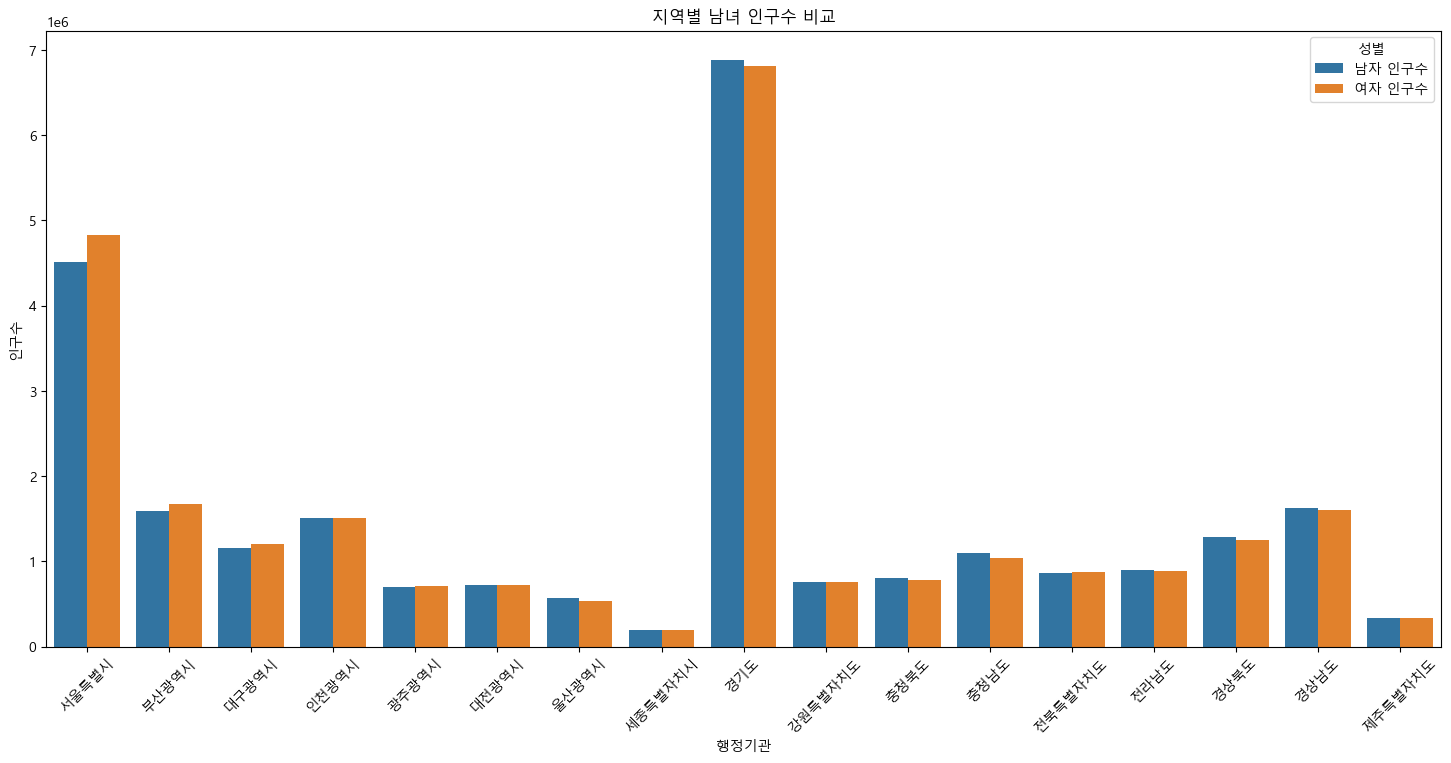

In [ ]:
# 6. 남자 인구 vs 여자 인구 비교 Plot ( 선택 )

df_filtered = df[df['행정기관'] != '전국'].copy()

# 2. 데이터 재구조화 (Wide -> Long)
# id_vars: 기준이 되는 컬럼 (유지할 컬럼)
# value_vars: 합치고 싶은 컬럼들 (남자, 여자)
# var_name: 합친 컬럼들의 새로운 이름 (예: 성별)
# value_name: 값들의 새로운 이름 (예: 인구수)
melted_df = df_filtered.melt(id_vars='행정기관', 
                             value_vars=['남자 인구수', '여자 인구수'], 
                             var_name='성별', 
                             value_name='인구수')
# melt 함수가 뭘까? 
# 데이터프레임을 넓은 형태에서 긴 형태로 바꾸는 함수

# 3. 그래프 그리기
plt.figure(figsize=(18, 8))

# hue='성별'을 추가하여 남/녀를 색상으로 구분
sns.barplot(data=melted_df, x='행정기관', y='인구수', hue='성별')

plt.title('지역별 남녀 인구수 비교')
plt.xticks(rotation=45)
plt.legend(title='성별')
plt.show()